In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Redback_B/cardio_data_processed.csv')

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [6]:
df = df.drop(["id", "age", "bp_category"], axis=1)
# drop less meaningful variables

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['bp_category_encoded'] = label_encoder.fit_transform(df['bp_category_encoded'])

In [8]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_encoded
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,3


In [9]:
import time

# Start the timer
start_time = time.time()

In [17]:
# Import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Define X and y
y = df.cardio
X = df.drop('cardio', axis=1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=456)

In [18]:
from sklearn.preprocessing import StandardScaler
# List of numeric columns
numeric_columns = ['age_years', 'weight', 'height', 'bmi', 'ap_hi', 'ap_lo']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training set and transform both the training and test sets
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [24]:
# create an instance of Random Forest Classifier
rf = RandomForestClassifier()

# Set the parameter grid to search over
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [10, 20, 30],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5],

}

# Use GridSearchCV to search over the parameter grid and find the best parameter values
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Print the best parameter values
print("Best parameters: ", grid_search.best_params_)

# Use the best parameter values to create a random forest classifier
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)

# perform cross-validation on the training set
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=3)

# print the cross-validation scores
print("Parameter values of best_rf: ", best_rf.get_params())
print("Cross-validation scores:", cv_scores)

Best parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Parameter values of best_rf:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Cross-validation scores: [0.73125982 0.72395375 0.73017469]


In [25]:
# fit the model on the training set
random_forest = best_rf.fit(X_train, y_train)

# Predict the labels
y_predicted = random_forest.predict(X_test)

# Print accuracy score and confusion matrix on test set
print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on the test set:  0.7368292444531326
[[0.40377285 0.10253152]
 [0.16063923 0.3330564 ]]


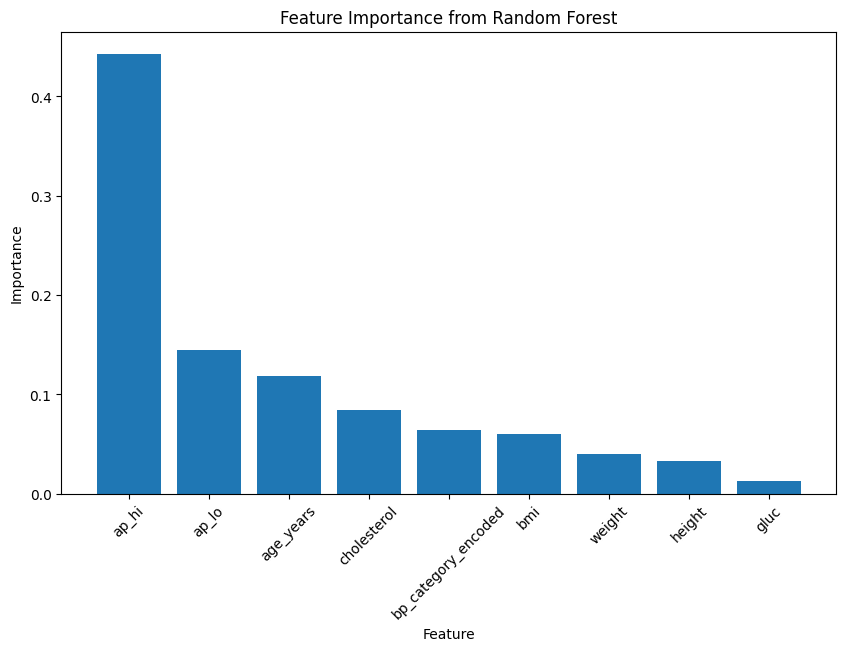

In [26]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = best_rf.feature_importances_

# Sort features in descending order of importance
import numpy as np
indices = np.argsort(feature_importances)[::-1]

# Get the feature names
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

In [27]:
# Calculate the elapsed time
elapsed_time = time.time() - start_time

# Print the elapsed time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))

Elapsed time: 3759.40 seconds
